### Neural Computation Week 2 Exercise: Gradient Descent for Linear Regression

In this exercise, we'll develop implementations of gradient descent and its minibatch algorithms. As in Week 1 Exercise on linear regression, we will use the `Boston Housing` dataset. Instead of using the exact solution, which was explored in Week 1, here we use gradient descent and minibatch gradient descent to solve this problem.

In this exercise, you will learn the following
* implement the `gradient descent` method
* implement the `minibatch gradient descent` method

In [2]:
import matplotlib
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from sklearn import preprocessing   # for normalization

## Boston Housing Data

We will use the Boston Housing data, similar to Week 1. We can import the dataset and preprocess it as follows. Note we add a feature of $1$ to `x_input` to get a n x (d+1) matrix `x_in`

In [3]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data = boston_data;
x_input = data  # a data matrix
y_target = target; # a vector for all outputs
# add a feature 1 to the dataset, then we do not need to consider the bias and weight separately
x_in = np.concatenate([np.ones([np.shape(x_input)[0], 1]), x_input], axis=1)
# we normalize the data so that each has regularity
x_in = preprocessing.normalize(x_in)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Benwm\AppData\Local\Temp\ipykernel_15612\3595015158.py:4: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


## Linear Model

A linear regression model in one variable has the following form
$$
f(x)=\mathbf{w}^\top \mathbf{x}.
$$
The following function computes the output of the linear model on a data matrix of size n x (d+1).

In [4]:
def linearmat_2(w, X):
    '''
    a vectorization of linearmat_1 in Week 1 lab.
    Input: w is a weight parameter (including the bias), and X is a data matrix (n x (d+1)) (including the feature)
    Output: a vector containing the predictions of linear models
    '''
    return np.dot(X, w)

## Cost Function

We defined the following `mean square error` function for a linear regression problem using the square loss:
$$
C(\mathbf{y}, \mathbf{t}) = \frac{1}{2n}(\mathbf{y}-\mathbf{t})^\top (\mathbf{y}-\mathbf{t}).
$$
The python implementation is as follows

In [5]:
def cost(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for
    inputs `X` and outputs `y`, at weights `w`.
    '''
    residual = y - linearmat_2(w, X)  # get the residual
    err = np.dot(residual, residual) / (2 * len(y)) # compute the error

    return err

## Gradient Computation

Our methods require to use the gradient of the `cost` function. As discussed in the lecture, the gradient can be computed by
$$\nabla C(\mathbf{w}) =\frac{1}{n}X^\top\big(X\mathbf{w}-\mathbf{y}\big)$$
In the following, we present the python implementation on the gradient computation

In [6]:
# Vectorized gradient function
def gradfn(weights, X, y):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,d+1) of input features including the feature $1$
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''

    y_pred = np.dot(X, weights)
    error = y_pred - y
    return np.dot(X.T, error) / len(y)

## Gradient Descent

Gradient Descent iteratively updates the model by moving along the negative direction
$$\mathbf{w}^{(t+1)} \leftarrow \mathbf{w}^{(t)} - \eta\nabla C(\mathbf{w}^{(t)}),$$
where $\eta$ is a learning rate and $\nabla C(w^{(t)})$ is the gradient evaluated at current parameter value $\mathbf{w}^{(t)}$. In the following, we give the python implementation of the gradient descent on the linear regression problem. Here, we use `idx_res` to store the indices of iterations where we have computed the cost, and use `err_res` to store the cost of models at these iterations. These will be used to plot how the `cost` will behave `versus iteration` number.

In [7]:
def solve_via_gradient_descent(X, y, print_every=100,
                               niter=5000, eta=1):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
          `print_every` - we report performance every 'print_every' iterations
          `niter` - the number of iterates allowed
          `eta` - learning rate
    Solves for linear regression weights with gradient descent.

    Return
        `w` - weights after `niter` iterations
        `idx_res` - the indices of iterations where we compute the cost
        `err_res` - the cost at iterations indicated by idx_res
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    idx_res = []
    err_res = []
    for k in range(niter):
        # TODO: Insert your code to update w by gradient descent
        w = w - eta * gradfn(w, X, y)


        # we report the progress every print_every iterations
        if k % print_every == print_every - 1:
            t_cost = cost(w, X, y)
            print('error after %d iteration: %s' % (k, t_cost))
            idx_res.append(k)
            err_res.append(t_cost)
    return w, idx_res, err_res

Now we apply **gradient descent** to solve the **Boston House Price** prediction problem, and get the weight `w_gd`, the indices `idx_gd` and the errors 'err_gd' on these indices

In [8]:
w_gd, idx_gd, err_gd = solve_via_gradient_descent( X=x_in, y=y_target)

error after 99 iteration: 31.791693326233144
error after 199 iteration: 31.023607992661894
error after 299 iteration: 30.49038315527973
error after 399 iteration: 30.08955829529193
error after 499 iteration: 29.765768454560703
error after 599 iteration: 29.4886933766529
error after 699 iteration: 29.241419443720766
error after 799 iteration: 29.014275853482037
error after 899 iteration: 28.801555744273426
error after 999 iteration: 28.59976078966275
error after 1099 iteration: 28.40665272049836
error after 1199 iteration: 28.22073414080487
error after 1299 iteration: 28.04095920855527
error after 1399 iteration: 27.866568543075008
error after 1499 iteration: 27.69699215232022
error after 1599 iteration: 27.531790279455212
error after 1699 iteration: 27.370615897731934
error after 1799 iteration: 27.213189941761843
error after 1899 iteration: 27.059284304933385
error after 1999 iteration: 26.90870976389502
error after 2099 iteration: 26.761307158670412
error after 2199 iteration: 26.616

## Minibatch Gradient Descent

The optimization problem in ML often has a **sum** structure in the sense
$$
C(\mathbf{w})=\frac{1}{n}\sum_{i=1}^nC_i(\mathbf{w}),
$$
where $C_i(\mathbf{w})$ is the loss of the model $\mathbf{w}$ on the $i$-th example. In our Boston House Price prediction problem, $C_i$ takes the form $C_i(\mathbf{w})=\frac{1}{2}(\mathbf{w}^\top\mathbf{x}^{(i)}-y^{(i)})^2$.

Gradient descent requires to go through all training examples to compute a single gradient, which may be time consuming if the sample size is large. Minibatch gradient descent improves the efficiency by using a subset of training examples to build an **approximate** gradient. At each iteration, it first randomly draws a set $B_t\subseteq\{1,2,\ldots,n\}$ of size $b$, where we often call $b$ the minibatch size. Then it builds an approximate gradient by
$$
\nabla^{B_t}(\mathbf{w}^{(t)})=\frac{1}{b}\sum_{i\in B_t}\nabla C_i(\mathbf{w}^{(t)})
$$
Now, it updates the model by
$$
\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}-\eta_t\nabla^{B_t}(\mathbf{w}^{(t)}).
$$
It is recommended to use $b\in[20,100]$. Depending on different $b$, minibatch gradient descent recovers several algorithms
\begin{align*}
  b<n \Rightarrow \text{Minibatch gradient descent}\\
  b=1 \Rightarrow \text{Stochastic gradient descent}
\end{align*}
In the following, we request you to finish the following implementation of the `minibatch gradient descent` on the linear regression problem. To search a subset of $\{1,2,\ldots,n\}$, we recommend you to use the function `random.sample`. The syntax is `random.sample(sequence, k)`, which returns $k$ length new list of elements chosen from the `sequence`. More details can be found  [here](https://www.geeksforgeeks.org/python-random-sample-function/)

In [9]:
def solve_via_minibatch(X, y, print_every=100,
                               niter=5000, eta=1, batch_size=50):
    '''
    Solves for linear regression weights with nesterov momentum.
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
          `print_every` - we report performance every 'print_every' iterations
          `niter` - the number of iterates allowed
          `eta` - learning rate
          `batch_size` - the size of minibatch
    Return
        `w` - weights after `niter` iterations
        `idx_res` - the indices of iterations where we compute the cost
        `err_res` - the cost at iterations
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    idx_res = []
    err_res = []
    tset = list(range(N))
    for k in range(niter):
        # TODO: Insert your code to update w by minibatch gradient descent
        idx = random.sample(tset, batch_size)
        #sample batch of data
        sample_X = X[idx, :]
        sample_y = y[idx]

        w = w - eta * gradfn(w,sample_X,sample_y)

        if k % print_every == print_every - 1:
            t_cost = cost(w, X, y)
            print('error after %d iteration: %s' % (k, t_cost))
            idx_res.append(k)
            err_res.append(t_cost)
    return w, idx_res, err_res

Now we apply minibatch gradient descent to solve the Boston House Price prediction problem.

In [10]:
w_batch, idx_batch, err_batch = solve_via_minibatch( X=x_in, y=y_target)

error after 99 iteration: 32.10710028493458
error after 199 iteration: 31.814309742510606
error after 299 iteration: 30.580954988463898
error after 399 iteration: 30.3180319600222
error after 499 iteration: 30.208930523631306
error after 599 iteration: 29.839832564312534
error after 699 iteration: 29.328675845280234
error after 799 iteration: 31.150612280051124
error after 899 iteration: 28.85041937364286
error after 999 iteration: 28.642657994009486
error after 1099 iteration: 28.44279324190284
error after 1199 iteration: 28.491083871454205
error after 1299 iteration: 28.277416364682352
error after 1399 iteration: 29.457827799820503
error after 1499 iteration: 28.119228464667554
error after 1599 iteration: 28.2263758596059
error after 1699 iteration: 27.49586913182156
error after 1799 iteration: 27.288955382677806
error after 1899 iteration: 27.26032897319234
error after 1999 iteration: 27.07420029663144
error after 2099 iteration: 26.79550140710524
error after 2199 iteration: 26.8311

### Comparison between Minibatch Gradient Descent and Gradient Descent

We can now compare the behavie of Minibatch Gradient Descent and Gradient Descent. In particular, we will show how the `cost` of models found by the algorithm at different iterations would behave with respect to the iteration number.

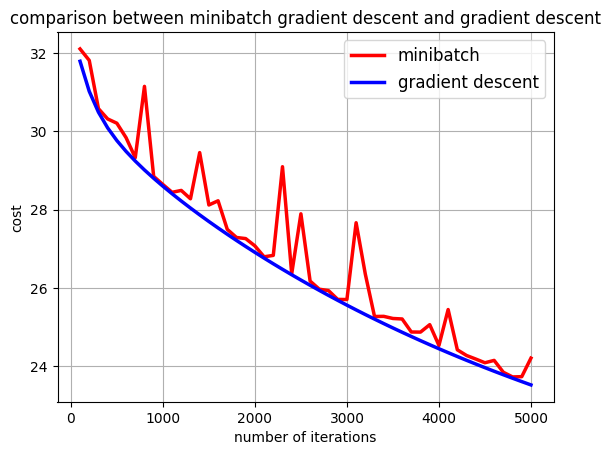

In [11]:
plt.plot(idx_batch, err_batch, color="red", linewidth=2.5, linestyle="-", label="minibatch")
plt.plot(idx_gd, err_gd, color="blue", linewidth=2.5, linestyle="-", label="gradient descent")
plt.legend(loc='upper right', prop={'size': 12})
plt.title('comparison between minibatch gradient descent and gradient descent')
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.grid()
plt.show()